In [ ]:
# Importing necessary libraries
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Importing this data: https://www.kaggle.com/datasets/batoolabbas91/flower-photos-by-the-tensorflow-team

# Path for the root dataset directory
data_dir = "../input/flower-photos-by-the-tensorflow-team/flower_photos"

In [ ]:
os.listdir(data_dir) #to save the contents of data directory and show its classes

['LICENSE.txt', 'dandelion', 'sunflowers', 'daisy', 'roses', 'tulips']

In [ ]:
# Let's see how many classes we have in our dataset
classes = os.listdir(data_dir) #same as last command
classes.remove("LICENSE.txt")  #removing this class

# Counting number of images per class
image_count = [len(os.listdir(os.path.join(data_dir,classes[i]))) for i in range(5)]

print(classes)
print(image_count)

['dandelion', 'sunflowers', 'daisy', 'roses', 'tulips']
[898, 699, 633, 641, 799]


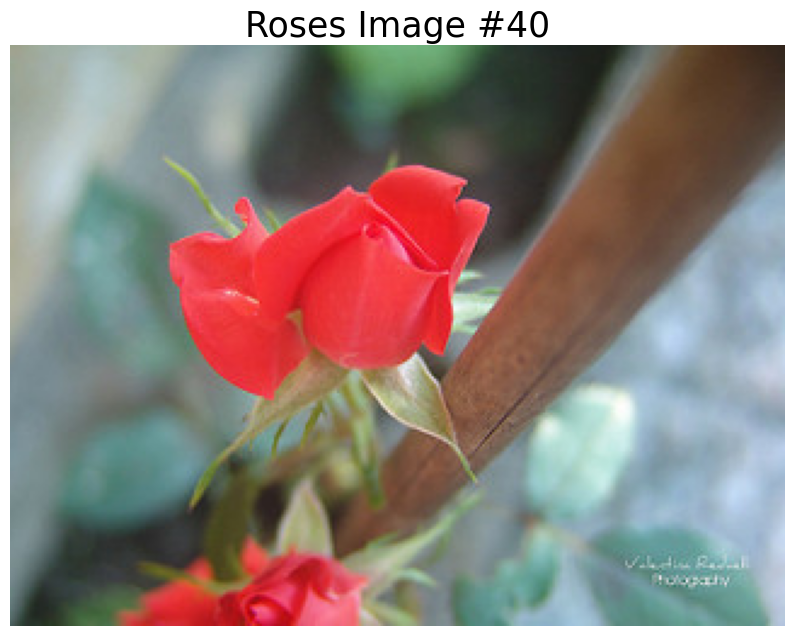

In [ ]:
# Take a look into random roses image (Re-Run to get different different images of rose in the data)
roses = os.listdir(os.path.join(data_dir, "roses"))              # List of image files contained in 'roses' folder
plt.figure(figsize = (10, 8))                                    # Adjusting Figure Size
num = np.random.randint(len(roses))+1                            # Python index starts from 0 hence + 1 is seen here
img = Image.open(os.path.join(data_dir, "roses", roses[num]))    # Get a rose image based on the num got from above line(here, random)
plt.title(f"Roses Image #{num}", fontsize = 25)                  # Adding title to the plot
plt.imshow(img)                                                  # Showing the figure
plt.axis('off')                                                  # Turning off the axes
plt.show()                                                       # Avoids any information getting printed above/below the image

In [ ]:
# Loading data using Keras utility
batch_size = 32               # Each batch will consist of 32 images only
img_height = img_width = 180  # Image Size

In [ ]:
# Creating the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Creating the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# Printing class names
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


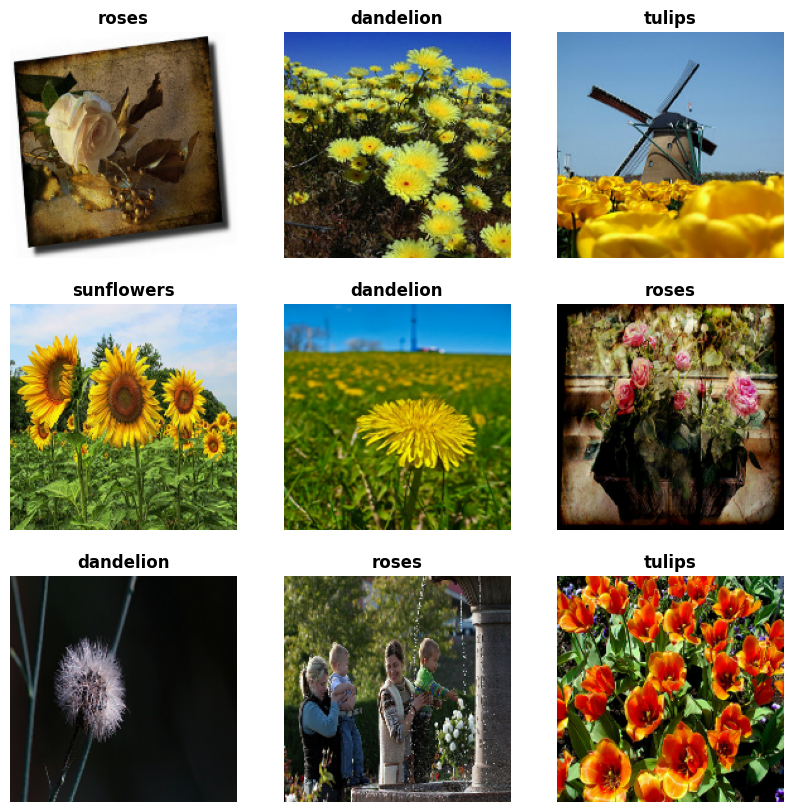

In [ ]:
#Visualizing the data

# Here are the first nine images from the training dataset.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # Only takes one batch from 92 batches
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Takes i + 1 so that even at index 0 answer is 1
        plt.imshow(images[i].numpy().astype("uint8"))   #converts the array values to integers between 0 and 255
        plt.title(class_names[labels[i]], weight = 'bold')   #extracts the label of i, for ex, for tulips it would extract the 4 (as it is on 4th index) and then convert it to its label i.e tulips and then print it in output as title over image in bold
        plt.axis("off")


In [ ]:
# Get batches of images and labels
for image_batch, labels_batch in train_ds:
    #print(labels_batch)
    print(f'Image Shape (Batch Size, Height, Width, Channels):- {image_batch.shape}')
    print(f'Respective labels in a batch:- {labels_batch.shape}')
    print(image_batch[-1].shape)
    break
print(f'total batches:- {len(train_ds)}')

Image Shape (Batch Size, Height, Width, Channels):- (32, 180, 180, 3)
Respective labels in a batch:- (32,)
(180, 180, 3)
total batches:- 92


In [ ]:
for image_batch, labels_batch in train_ds:
    if labels_batch.shape != (32,):
        print(image_batch.shape)

(24, 180, 180, 3)


In [ ]:
#Standardizing the data

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
# Data Augmentation

# Adding randomflip, randomrotation and randomzoom
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)])

In [ ]:
#Training the model

num_classes = 5

# Sequential groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.Sequential([

    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
    tf.keras.layers.Conv2D(32, 3, activation='relu'),

    #32 filters with 3*3 shape and activation function set to relu and output will be a feature map

    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D
    tf.keras.layers.MaxPooling2D(),

    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
    tf.keras.layers.Dropout(0.2),   #dropping 20% of filters

    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 89, 89, 32)        128       
 chNormalization)                                     

In [ ]:
# Configures the model for training.
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
history.history

{'loss': [1.9392385482788086,
  1.3817769289016724,
  1.177901029586792,
  1.020380973815918,
  0.9349615573883057,
  0.9006794095039368,
  0.8297362923622131,
  0.8037115931510925,
  0.7585282921791077,
  0.7495284080505371],
 'accuracy': [0.4492506682872772,
  0.5248637795448303,
  0.5592643022537231,
  0.6032016277313232,
  0.6376021504402161,
  0.651566743850708,
  0.6784741282463074,
  0.6914169192314148,
  0.6995912790298462,
  0.7118528485298157],
 'val_loss': [4.140684127807617,
  6.8281168937683105,
  5.3574724197387695,
  4.732705593109131,
  4.609277248382568,
  2.6834347248077393,
  1.6186153888702393,
  1.1401751041412354,
  1.0439391136169434,
  1.0535633563995361],
 'val_accuracy': [0.23978202044963837,
  0.23978202044963837,
  0.23978202044963837,
  0.24386921525001526,
  0.2697547674179077,
  0.3773841857910156,
  0.5177111625671387,
  0.5708447098731995,
  0.6198909878730774,
  0.6103542447090149]}

In [ ]:
# Training
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10


2023-12-19 13:47:08.510592: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 [==============================] - 9s 58ms/step - loss: 2.0958 - accuracy: 0.4458 - val_loss: 3.5169 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 5s 55ms/step - loss: 1.4495 - accuracy: 0.5150 - val_loss: 4.7178 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 5s 56ms/step - loss: 1.1775 - accuracy: 0.5640 - val_loss: 2.7532 - val_accuracy: 0.2779
Epoch 4/10
92/92 [==============================] - 5s 54ms/step - loss: 1.0080 - accuracy: 0.6131 - val_loss: 4.0836 - val_accuracy: 0.2616
Epoch 5/10
92/92 [==============================] - 5s 56ms/step - loss: 0.9513 - accuracy: 0.6287 - val_loss: 3.7515 - val_accuracy: 0.3488
Epoch 6/10
92/92 [==============================] - 5s 54ms/step - loss: 0.8603 - accuracy: 0.6672 - val_loss: 1.7790 - val_accuracy: 0.4428
Epoch 7/10
92/92 [==============================] - 5s 55ms/step - loss: 0.8343 - accuracy: 0.6839 - val_loss: 1.9050 - val_accuracy: 0.4578
Epoch 8/10
92/92 [======

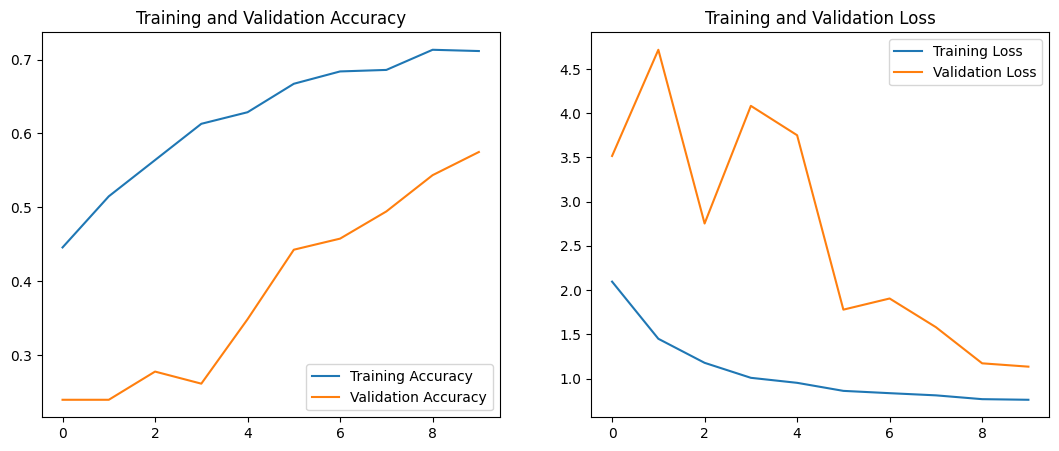

In [ ]:
#Visualizing training results

#Create plots of loss and accuracy on the training and validation sets

# Fetching the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Fetching the training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']

# Epochs to plot on x axis
epochs_range = range(10)


# Subplots to visualize the result in a better way
plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
